In [1]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation des données depuis mon Github
iris = pd.read_csv("https://raw.githubusercontent.com/simaleo/data_book1/main/iris.csv")

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Sélection des variables quantitatives et conversion en forme verticale.
x = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values

# Sélection de la variable catégorielle et conversion en format verticale.
y = iris['variety'].values

In [4]:
# Ensuite, on va standardier les quatres variables de la table x
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) 

In [5]:
# Mise en oeuvre de l'ACP
from sklearn.decomposition import PCA as sklearnPCA

# Retenir les deux composantes
pca = sklearnPCA(n_components=2)

# Prédiction des scores des deux facteurs retenus
score_data = pca.fit_transform(x) 

# Variances expliquées
print('Variances: \n', pca.explained_variance_ratio_) 

Variances: 
 [0.72962445 0.22850762]


In [6]:
# Selection des noms des especes
col = iris['variety'].unique()

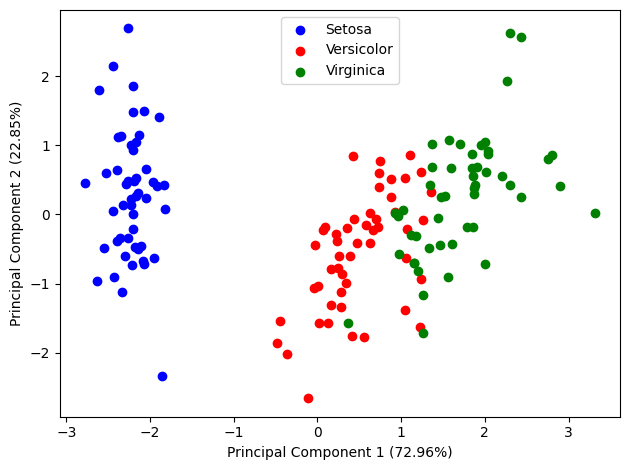

In [8]:
# ACP
for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'),('blue', 'red','green')): 
    plt.scatter(score_data[y==lab, 0], score_data[y==lab, 1], label=lab, c=col)
    
# Nom des axes
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.legend(loc='upper center')
plt.tight_layout()